# Network Intrusion Detection

In [1]:
%matplotlib inline

In [2]:
# to remove
%load_ext autoreload
%autoreload 2

In [44]:
import pandas as pd

import experiments

import numpy as np
from modAL.models import ActiveLearner
from modAL.uncertainty import entropy_sampling, uncertainty_sampling
import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_columns', 200)

In [5]:
%%time
ni = experiments.NetworkIntrusionDetection()

CPU times: user 16.1 s, sys: 2.4 s, total: 18.5 s
Wall time: 6.55 s


In [6]:
ni.df.shape

(494021, 42)

## Dataset stats

In [38]:
%%time
ni.report_labels()

CPU times: user 338 ms, sys: 56.8 ms, total: 395 ms
Wall time: 394 ms


attacks  prevalence  prevalence (overall)  records
label                                                           
smurf.         280790    0.742697              0.568377   378068
neptune.       107201    0.524264              0.216997   204479
back.            2203    0.022145              0.004459    99481
satan.           1589    0.016072              0.003216    98867
ipsweep.         1247    0.012657              0.002524    98525
portsweep.       1040    0.010578              0.002105    98318
warezclient.     1020    0.010377              0.002065    98298
teardrop.         979    0.009964              0.001982    98257
pod.              264    0.002707              0.000534    97542
nmap.             231    0.002369              0.000468    97509

## Baseline and Oracle

In [31]:
%%time
df_baseline_oracle = ni.report_baseline_oracle()

CPU times: user 21.6 s, sys: 6.24 s, total: 27.8 s
Wall time: 17.9 s


In [39]:
df_baseline_oracle[['baseline_unsupervised_f1', 'oracle_f1']].round(2)

baseline_unsupervised_f1  oracle_f1
label                                            
smurf.                            0.38       1.00
neptune.                          0.49       1.00
back.                             0.09       1.00
satan.                            0.91       1.00
ipsweep.                          0.07       1.00
portsweep.                        0.53       1.00
warezclient.                      0.01       0.99
teardrop.                         0.30       1.00
pod.                              0.00       0.98
nmap.                             0.51       1.00

In [40]:
df_baseline_oracle.mean().round(2)

baseline_random_FN                 1313.50
baseline_random_FP                 1314.50
baseline_random_f1                    0.14
baseline_random_precision             0.14
baseline_random_recall                0.14
baseline_unsupervised_FN           2528.40
baseline_unsupervised_FP           1584.00
baseline_unsupervised_f1              0.33
baseline_unsupervised_precision       0.34
baseline_unsupervised_recall          0.32
oracle_FN                             0.50
oracle_FP                             0.00
oracle_average precision              1.00
oracle_f1                             1.00
oracle_precision                      1.00
oracle_recall                         0.99
oracle_roc auc                        1.00
oracle_train time (s)                 0.24
prevalence                            0.14
dtype: float64

In [41]:
df_baseline_oracle.std().round(2)

baseline_random_FN                 2594.14
baseline_random_FP                 2596.90
baseline_random_f1                    0.27
baseline_random_precision             0.27
baseline_random_recall                0.27
baseline_unsupervised_FN           6104.01
baseline_unsupervised_FP           3337.23
baseline_unsupervised_f1              0.29
baseline_unsupervised_precision       0.30
baseline_unsupervised_recall          0.30
oracle_FN                             0.71
oracle_FP                             0.00
oracle_average precision              0.00
oracle_f1                             0.01
oracle_precision                      0.00
oracle_recall                         0.01
oracle_roc auc                        0.00
oracle_train time (s)                 0.14
prevalence                            0.27
dtype: float64

## Active Learning

In [64]:
df_active_learning = ni.report_active_learning()
df_active_learning

Label: smurf., learner: RandomForestClassifier, sampling strategy: random_sampling
Available, retrieving...
Label: smurf., learner: RandomForestClassifier, sampling strategy: entropy_sampling
Available, retrieving...
Label: smurf., learner: RandomForestClassifier, sampling strategy: uncertainty_sampling
Available, retrieving...
Label: smurf., learner: LogisticRegression, sampling strategy: random_sampling
Available, retrieving...
Label: smurf., learner: LogisticRegression, sampling strategy: entropy_sampling
Available, retrieving...
Label: smurf., learner: LogisticRegression, sampling strategy: uncertainty_sampling
Available, retrieving...
Label: neptune., learner: RandomForestClassifier, sampling strategy: random_sampling
Available, retrieving...
Label: neptune., learner: RandomForestClassifier, sampling strategy: entropy_sampling
Available, retrieving...
Label: neptune., learner: RandomForestClassifier, sampling strategy: uncertainty_sampling
Available, retrieving...
Label: neptune.,

initial_FN  initial_FP  initial_average precision  initial_f1  \
0          10           0                   1.000000    0.999822   
1          10           0                   1.000000    0.999822   
2          10           0                   1.000000    0.999822   
3           9          57                   0.999997    0.998826   
4           9          57                   0.999997    0.998826   
5           9          57                   0.999997    0.998826   
0           4           0                   1.000000    0.999813   
1           4           0                   1.000000    0.999813   
2           4           0                   1.000000    0.999813   
3           6           3                   0.999993    0.999580   
4           6           3                   0.999993    0.999580   
5           6           3                   0.999993    0.999580   
0           2           0                   1.000000    0.995434   
1           2           0                   1.000000    0.995434   
2           2           0                   1.000000    0.995434   
3           4          24                   0.809557    0.939130   
4           4          24                   0.809557    0.939130   
5           4          24                   0.809557    0.939130   
0          16           0                   0.990126    0.947020   
1          16           0                   0.990126    0.947020   
2          16           0                   0.990126    0.947020   
3          17           0                   0.997285    0.943522   
4          17           0                   0.997285    0.943522   
5          17           0                   0.997285    0.943522   
0           4           0                   0.997280    0.983740   
1           4           0                   0.997280    0.983740   
2           4           0                   0.997280    0.983740   
3           8          10                   0.931825    0.928571   
4           8          10                   0.931825    0.928571   
5           8          10                   0.931825    0.928571   
0           2           0                   0.990394    0.990291   
1           2           0                   0.990394    0.990291   
2           2           0                   0.990394    0.990291   
3         104           0                   0.070932    0.000000   
4         104           0                   0.070932    0.000000   
5         104           0                   0.070932    0.000000   
0          21           2                   0.941510    0.875676   
1          21           2                   0.941510    0.875676   
2          21           2                   0.941510    0.875676   
3          20          22                   0.819296    0.796117   
4          20          22                   0.819296    0.796117   
5          20          22                   0.819296    0.796117   
0           7           0                   1.000000    0.962963   
1           7           0                   1.000000    0.962963   
2           7           0                   1.000000    0.962963   
3          14           3                   0.971430    0.908108   
4          14           3                   0.971430    0.908108   
5          14           3                   0.971430    0.908108   
0           7           0                   0.961641    0.844444   
1           7           0                   0.961641    0.844444   
2           7           0                   0.961641    0.844444   
3           8          14                   0.278714    0.620690   
4           8          14                   0.278714    0.620690   
5           8          14                   0.278714    0.620690   
0           7           0                   0.826497    0.820513   
1           7           0                   0.826497    0.820513   
2           7           0                   0.826497    0.820513   
3          12          15                   0.299644    0.4

In [31]:
ni.report_active_learning_across_labels()

initial_FN        initial_FP         \
                                               mean    std       mean    std   
learner                sampling strategy                                       
LogisticRegression     entropy_sampling        20.2  29.86       14.8  17.18   
                       random_sampling         20.2  29.86       14.8  17.18   
RandomForestClassifier entropy_sampling         8.0   6.18        0.2   0.63   
                       random_sampling          8.0   6.18        0.2   0.63   

                                         initial_average precision        \
                                                              mean   std   
learner                sampling strategy                                   
LogisticRegression     entropy_sampling                       0.72  0.36   
                       random_sampling                        0.72  0.36   
RandomForestClassifier entropy_sampling                       0.97  0.05   
                       random_sampling                        0.97  0.05   

                                         initial_f1       initial_precision  \
                                               mean   std              mean   
learner                sampling strategy                                      
LogisticRegression     entropy_sampling        0.76  0.32              0.76   
                       random_sampling         0.76  0.32              0.76   
RandomForestClassifier entropy_sampling        0.94  0.07              1.00   
                       random_sampling         0.94  0.07              1.00   

                                               initial_recall        \
                                           std           mean   std   
learner                sampling strategy                              
LogisticRegression     entropy_sampling   0.33           0.76  0.31   
                       random_sampling    0.33           0.76  0.31   
RandomForestClassifier entropy_sampling   0.01           0.90  0.12   
                       random_sampling    0.01           0.90  0.12   

                                         initial_roc auc       query time (s)  \
                                                    mean   std           mean   
learner                sampling strategy                                        
LogisticRegression     entropy_sampling             0.97  0.04           0.00   
                       random_sampling              0.97  0.04           0.00   
RandomForestClassifier entropy_sampling             0.99  0.03           0.11   
                       random_sampling              0.99  0.03           0.11   

                                              sample_100_FN         \
                                          std          mean    std   
learner                sampling strategy                             
LogisticRegression     entropy_sampling   0.0           5.0   5.91   
                       random_sampling    0.0          23.7  30.27   
RandomForestClassifier entropy_sampling   0.0           1.2   1.81   
                       random_sampling    0.0           9.5   5.89   

                                         sample_100_FP         \
                                                  mean    std   
learner                sampling strategy                        
LogisticRegression     entropy_sampling           15.4  31.90   
                       random_sampling             9.7   8.81   
RandomForestClassifier entropy_sampling            0.0   0.00   
                       random_sampling             0.3   0.67   

                                         sample_100_average precision        \
                                                                 mean   std   
learner                sampling strategy                                      
LogisticRegression     entropy_sampling                          0.86  0.25   
                       random_sampling                          

In [50]:
ni.report_active_learning_query_time()

{('RandomForestClassifier', 'random_sampling'): {'0.04±0.04'},
 ('RandomForestClassifier', 'entropy_sampling'): {'0.18±0.07'},
 ('LogisticRegression', 'random_sampling'): {'0.04±0.04'},
 ('LogisticRegression', 'entropy_sampling'): {'0.04±0.04'}}

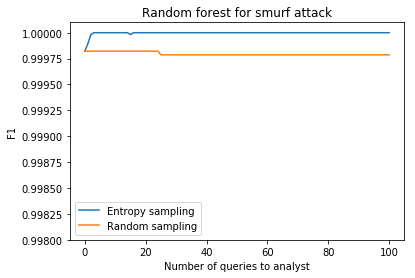

In [84]:
ni.plot_active_learning_time_series_overlapping(
    attribute='f1', label='smurf',
    learner1='RandomForestClassifier', sampling1='entropy',
    learner2='RandomForestClassifier', sampling2='random',
    title='Random forest for smurf attack',
    ylim=[0.9980, 1.0001], ylabel='F1',
    legend=['Entropy sampling', 'Random sampling']
)

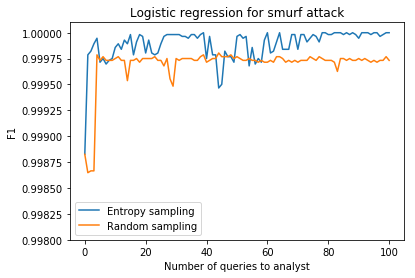

In [68]:
ni.plot_active_learning_time_series_overlapping(
    attribute='f1', label='smurf',
    learner1='LogisticRegression', sampling1='entropy',
    learner2='LogisticRegression', sampling2='random',
    title='Logistic regression for smurf attack',
    ylim=[0.9980, 1.0001], ylabel='F1',
    legend=['Entropy sampling', 'Random sampling']
)

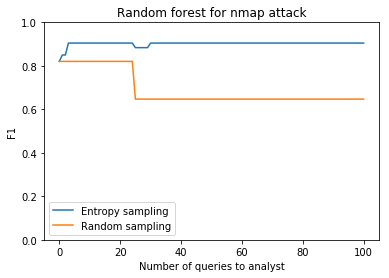

In [62]:
ni.plot_active_learning_time_series_overlapping(
    attribute='f1', label='nmap',
    learner1='RandomForestClassifier', sampling1='entropy',
    learner2='RandomForestClassifier', sampling2='random',
    title='Random forest for nmap attack',
    ylim=[0, 1], ylabel='F1',
    legend=['Entropy sampling', 'Random sampling']
)

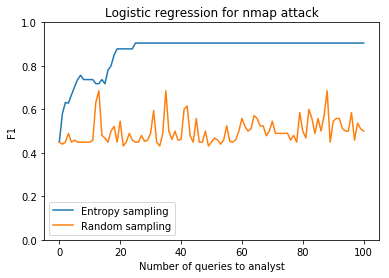

In [61]:
ni.plot_active_learning_time_series_overlapping(
    attribute='f1', label='nmap',
    learner1='LogisticRegression', sampling1='entropy',
    learner2='LogisticRegression', sampling2='random',
    title='Logistic regression for nmap attack',
    ylim=[0, 1], ylabel='F1',
    legend=['Entropy sampling', 'Random sampling']
)

## Ensemble

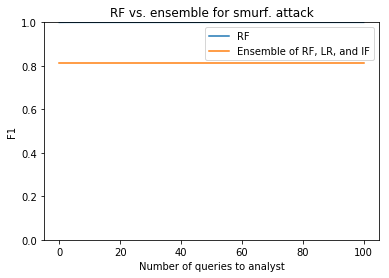

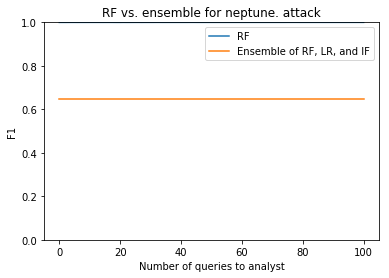

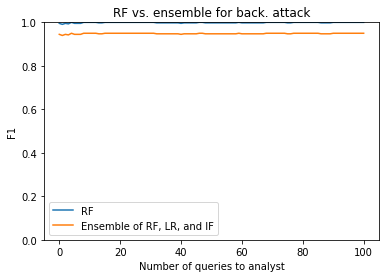

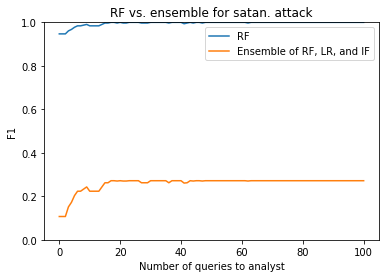

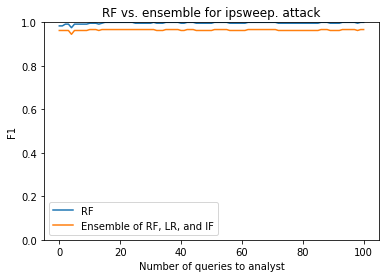

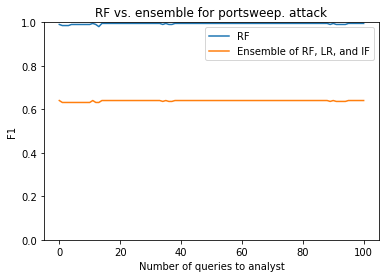

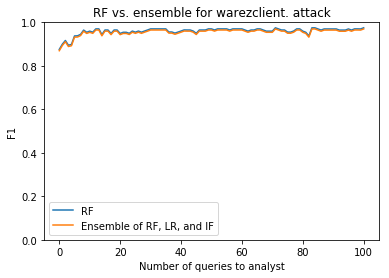

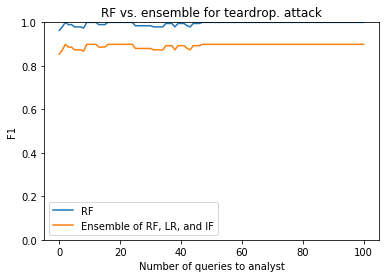

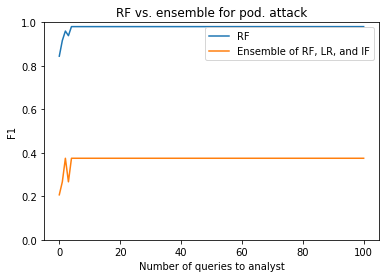

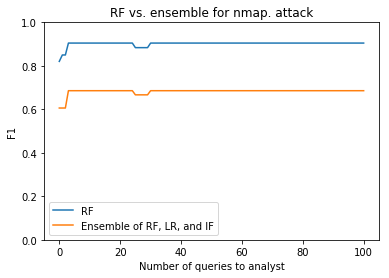

In [247]:
for label in ni.features:
    try:
        ni.plot_active_learning_time_series_overlapping(
            attribute='f1', label=label.replace('.', ''),
            learner1='RandomForestClassifier', sampling1='entropy',
            learner2='VotingClassifier', sampling2='entropy',
            title=f'RF vs. ensemble for {label} attack',
            ylim=[0, 1], ylabel='F1',
            legend=['RF', 'Ensemble of RF, LR, and IF']
        )
        plt.show()
    except:
        pass

## Error analysis

### Uncertainty sampling drawbacks

In [130]:
label = 'nmap.'

In [218]:
def get_predictions(estimator):
    predictions = estimator.predict(active_learning_data.x_dev)
    print(ni._get_metrics(active_learning_data.y_dev,
                    predictions, None))
    return predictions

def get_feature_importance(estimator, n=10):
    df = pd.DataFrame({'feature': ni.splits[label]['x_train'].columns,
             'importance': estimator.feature_importances_}).sort_values(by='importance', ascending=False)[:n][::-1]
    df.set_index('feature').plot(kind='barh', legend=False)
    plt.title(f'Top {n} features by importance')
    plt.xlabel('Gini importance')
    
def get_gets_wrong(predictions):
    return pd.DataFrame(active_learning_data.x_dev[predictions != active_learning_data.y_dev],
                 columns=ni.splits['nmap.']['x_train'].columns)
    
def get_right_wrong_comp(predictions, n=10):
    # doesn't get right
    gets_wrong = get_gets_wrong(predictions)
    gets_right = pd.DataFrame(active_learning_data.x_dev[(predictions == active_learning_data.y_dev) & (active_learning_data.y_dev)],
             columns=ni.splits['nmap.']['x_train'].columns)
    z = (gets_wrong.mean() - gets_right.mean()) / gets_right.std()
    z = z.abs()
    return z[pd.notnull(z) & np.isfinite(z)].sort_values(ascending=False)[:n]

In [219]:
active_learning_data = ni._active_learning_data_split(label)
active_learner = ActiveLearner(ni.active_learning_rf, uncertainty_sampling,
                              active_learning_data.x_train_start.values,
                              active_learning_data.y_train_start.values)

In [220]:
predictions = get_predictions(active_learner)

{'precision': 1.0, 'recall': 0.6956521739130435, 'f1': 0.8205128205128205, 'FP': 0, 'FN': 7}


In [224]:
indices = np.array(range(len(active_learning_data.y_dev)))[predictions != active_learning_data.y_dev]
active_learner.predict_proba(active_learning_data.x_dev[indices])

array([[1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ]])

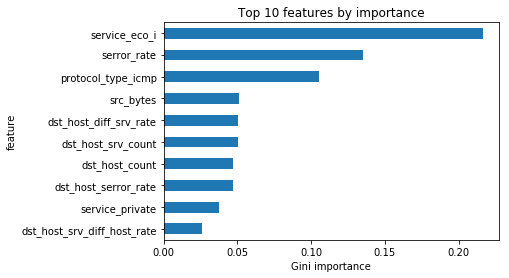

In [193]:
get_feature_importance(active_learner.estimator, n=10)

In [194]:
get_right_wrong_comp(predictions, n=10)

src_bytes                      28.821429
srv_diff_host_rate              0.750000
service_eco_i                   0.750000
service_private                 0.750000
protocol_type_icmp              0.750000
dst_host_srv_diff_host_rate     0.749792
dst_host_count                  0.617108
dst_host_serror_rate            0.532857
dst_host_diff_srv_rate          0.491316
srv_count                       0.455465
dtype: float64

In [226]:
index = active_learner.query(active_learning_data.x_train_pool.values)[0][0]
index

1488

In [196]:
pd.DataFrame(
active_learning_data.x_train_pool.values[index].reshape(1, -1),
    columns=ni.splits['nmap.']['x_dev'].columns
)

count  diff_srv_rate  dst_bytes  dst_host_count  dst_host_diff_srv_rate  \
0    1.0            0.0        0.0           234.0                    0.96   

   dst_host_rerror_rate  dst_host_same_src_port_rate  dst_host_same_srv_rate  \
0                   0.0                         0.97                     0.0   

   dst_host_serror_rate  dst_host_srv_count  dst_host_srv_diff_host_rate  \
0                  0.97                 1.0                          0.0   

   dst_host_srv_rerror_rate  dst_host_srv_serror_rate  duration  hot  \
0                       0.0                       1.0       0.0  0.0   

   is_guest_login  is_host_login  land  logged_in  num_access_files  \
0             0.0            0.0   0.0        0.0               0.0   

   num_compromised  num_failed_logins  num_file_creations  num_outbound_cmds  \
0              0.0                0.0                 0.0                0.0   

   num_root  num_shells  rerror_rate  root_shell  same_srv_rate  serror_rate  \
0       0.0         0.0          0.0         0.0            1.0          1.0   

   src_bytes  srv_count  srv_diff_host_rate  srv_rerror_rate  srv_serror_rate  \
0        0.0        1.0                 0.0              0.0              1.0   

   su_attempted  urgent  wrong_fragment  flag_OTH  flag_REJ  flag_RSTO  \
0           0.0     0.0             0.0       0.0       0.0        0.0   

   flag_RSTR  flag_S0  flag_S1  flag_S2  flag_S3  flag_SF  flag_SH  \
0        0.0      0.0      0.0      0.0      0.0      0.0      1.0   

   protocol_type_icmp  protocol_type_tcp  protocol_type_udp  service_IRC  \
0                 0.0                1.0                0.0          0.0   

   service_X11  service_auth  service_ctf  service_domain  service_domain_u  \
0          0.0           0.0          0.0             0.0               0.0   

   service_eco_i  service_ecr_i  service_finger  service_ftp  \
0            0.0            0.0             0.0          0.0   

   service_ftp_data  service_http  service_nntp  service_ntp_u  service_other  \
0               0.0           0.0           0.0            0.0            0.0   

   service_pop_3  service_private  service_red_i  service_shell  service_smtp  \
0            0.0              1.0            0.0            0.0           0.0   

   service_ssh  service_telnet  service_tftp_u  service_tim_i  service_time  \
0          0.0             0.0             0.0            0.0           0.0   

   service_urh_i  service_urp_i  
0            0.0            0.0

In [197]:
active_learning_data.y_train_pool[index]

True

In [198]:
x_instance, y_instance = ni._get_active_learning_instance(active_learning_data.x_train_pool,
                                                          active_learning_data.y_train_pool,
                                                          [index])

In [199]:
active_learner.teach(x_instance, y_instance)

In [201]:
predictions = get_predictions(active_learner)

{'precision': 1.0, 'recall': 0.7391304347826086, 'f1': 0.85, 'FP': 0, 'FN': 6}


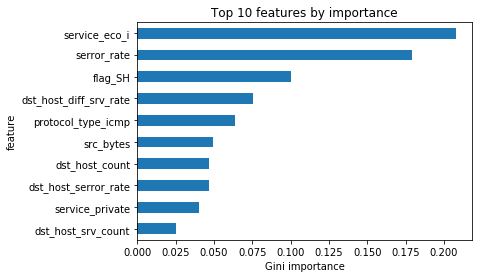

In [202]:
get_feature_importance(active_learner.estimator, n=10)

In [203]:
index = active_learner.query(active_learning_data.x_train_pool.values)[0][0]
index

9210

In [204]:
active_learning_data.y_train_pool[index]

True

In [205]:
x_instance, y_instance = ni._get_active_learning_instance(active_learning_data.x_train_pool,
                                                          active_learning_data.y_train_pool,
                                                          [index])

In [206]:
active_learner.teach(x_instance, y_instance)

In [208]:
predictions = get_predictions(active_learner)

{'precision': 1.0, 'recall': 0.7391304347826086, 'f1': 0.85, 'FP': 0, 'FN': 6}


In [209]:
pd.DataFrame(
active_learning_data.x_train_pool.values[index].reshape(1, -1),
    columns=ni.splits['nmap.']['x_dev'].columns
).src_bytes

0    0.0
Name: src_bytes, dtype: float64

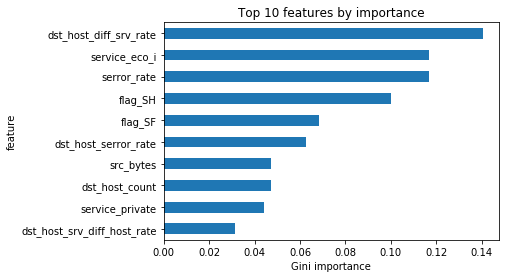

In [210]:
get_feature_importance(active_learner.estimator)

In [211]:
get_right_wrong_comp(predictions, n=10)

src_bytes                      34.302328
dst_host_same_src_port_rate    13.638587
dst_host_serror_rate            0.783118
dst_host_count                  0.731372
dst_host_diff_srv_rate          0.730442
srv_diff_host_rate              0.716498
service_eco_i                   0.716498
protocol_type_icmp              0.716498
service_private                 0.716498
dst_host_srv_diff_host_rate     0.716306
dtype: float64

In [213]:
clf = ni.active_learning_rf
clf.fit(ni.splits[label]['x_train'], ni.splits[label]['y_train'])
predictions = get_predictions(clf)

{'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'FP': 0, 'FN': 0}


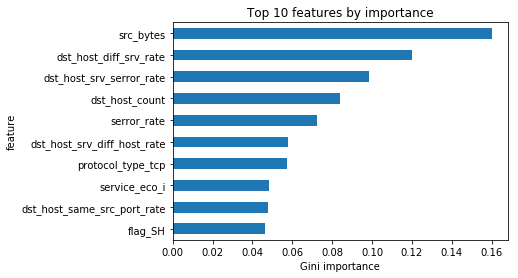

In [214]:
get_feature_importance(clf, n=10)

In [215]:
get_right_wrong_comp(predictions)

Series([], dtype: float64)

### FN, FP

In [57]:
df_learn_anomalies = ni.report_learn_anomalies()

Label: smurf., learner: RandomForestClassifier, sampling strategy: iforest_sampling
Label: neptune., learner: RandomForestClassifier, sampling strategy: iforest_sampling
Label: back., learner: RandomForestClassifier, sampling strategy: iforest_sampling
Label: satan., learner: RandomForestClassifier, sampling strategy: iforest_sampling
Label: ipsweep., learner: RandomForestClassifier, sampling strategy: iforest_sampling
Label: portsweep., learner: RandomForestClassifier, sampling strategy: iforest_sampling
Label: warezclient., learner: RandomForestClassifier, sampling strategy: iforest_sampling
Label: teardrop., learner: RandomForestClassifier, sampling strategy: iforest_sampling
Label: pod., learner: RandomForestClassifier, sampling strategy: iforest_sampling
Label: nmap., learner: RandomForestClassifier, sampling strategy: iforest_sampling


In [77]:
cols = ['label', 'initial_f1', 'sample_10_f1', 'sample_50_f1', 'sample_100_f1']
q = df_learn_anomalies[cols]
q.mean().round(2)

initial_f1       0.94
sample_10_f1     0.94
sample_50_f1     0.95
sample_100_f1    0.93
dtype: float64

In [78]:
q.std().round(2)

initial_f1       0.07
sample_10_f1     0.05
sample_50_f1     0.09
sample_100_f1    0.09
dtype: float64

In [79]:
qq = df_active_learning[(df_active_learning.learner == 'RandomForestClassifier')
                   & (df_active_learning['sampling strategy'] == 'entropy_sampling')][cols]
qq.mean().round(2)

initial_f1       0.94
sample_10_f1     0.98
sample_50_f1     0.98
sample_100_f1    0.99
dtype: float64

In [80]:
qq.std().round(2)

initial_f1       0.07
sample_10_f1     0.03
sample_50_f1     0.03
sample_100_f1    0.03
dtype: float64

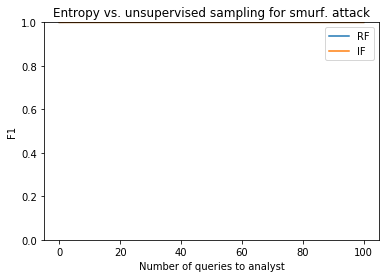

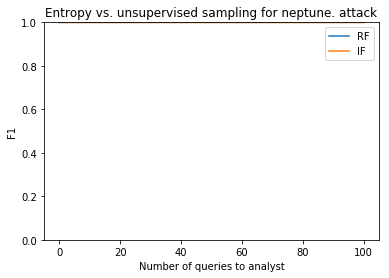

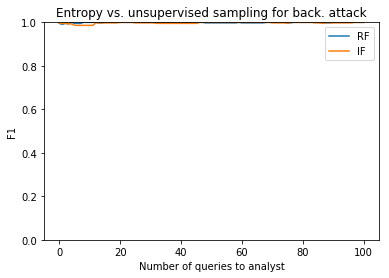

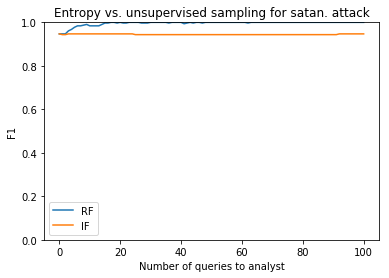

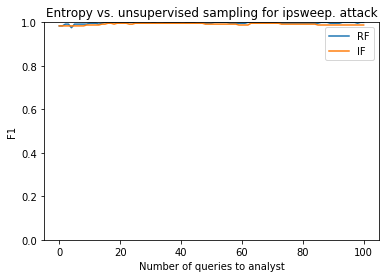

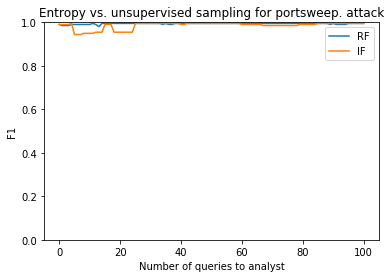

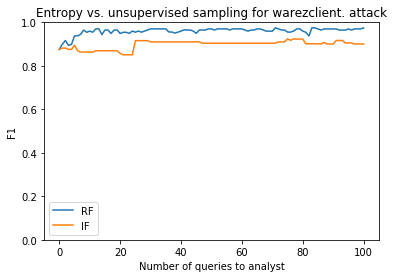

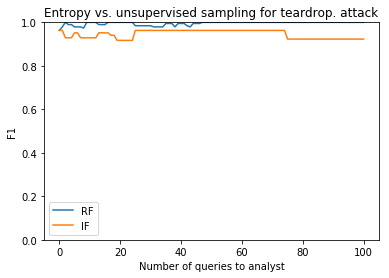

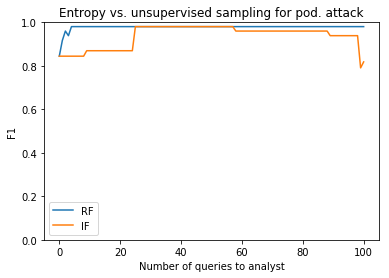

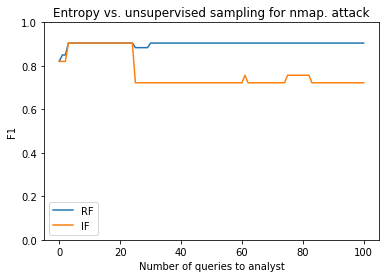

In [55]:
for label in ni.features:
    ni.plot_active_learning_time_series_overlapping(
        attribute='f1', label=label.replace('.', ''),
        learner1='RandomForestClassifier', sampling1='entropy',
        learner2='RandomForestClassifier', sampling2='iforest',
        title=f'Entropy vs. unsupervised sampling for {label} attack',
        ylim=[0, 1], ylabel='F1',
        legend=['RF', 'IF']
    )
    plt.show()

In [24]:
a = np.array([1,2,3,6, -1])
p = pd.Series(a)

In [28]:
i

array([4, 0, 1, 2, 3])

In [29]:
p.iloc[i]

4   -1
0    1
1    2
2    3
3    6
dtype: int64

In [23]:
i = np.argsort(a)
i[:3 + 1]

array([4, 0, 1, 2])